<a href="https://colab.research.google.com/github/Akshay-Rajesh/DSA_Activity/blob/main/Q%26A_Activity_Question_Week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q&A Activity Question Week -10
Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1)-Load the data into the pandas environment and identify some basic details of the dataset.**

In [99]:
data = pd.read_csv("employee.csv")

In [100]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


 Our data is list of employees in a company with features age ,income , gender ,department ,grade amd performance score.
 we also see the data has some missing values , it have 9 rows and 7 columns. 

### **2)-Reset the index as "name" as the index.**

In [102]:
data1 = data.set_index("name")

In [103]:
data1.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


### **3)- Select rows for specific names Jack Morgan and Josh wills.**

In [104]:
data1.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### **4)-Select data for multiple values "Sales" and “Finance”.**

In [105]:
array = ["Sales","Finance"]

In [106]:
data1.loc[data1["department"].isin(array)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### **5)-Display employee who has more than 700 performance score.**

In [107]:
data1[data1["performance_score"] > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### **6)- Display employee who has more than 500 and less than 700 performance score**

In [108]:
data1[(data1["performance_score"] < 700 ) & (data1["performance_score"] >500)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### **7)-Check and handle missing values in the dataset.**

In [109]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [110]:
data1[data1.isna().any(axis=1)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53


In [111]:
#we fill the missing value of income with mean of the income .
data1["income"].fillna(data1["income"].mean() , inplace = True)

In [112]:
#we fill age using mean
data1["age"].fillna(data1["age"].mean() , inplace = True)

In [113]:
data1["gender"].value_counts()

F    5
M    2
Name: gender, dtype: int64

In [114]:
# from above we can see we have more females , so we can use mode and fill the missing values for gender
data1["gender"].fillna("F" , inplace = True)

In [115]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9 non-null      float64
 1   income             9 non-null      float64
 2   gender             9 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 824.0+ bytes


We have filled all our missing values .

### **8)-Check the outliers and handle outliers in performance score using Percentiles.**

In [116]:
data1.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,F,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711


{'boxes': [<matplotlib.lines.Line2D at 0x7f9e8bda6ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9e8b8ea410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e8b75b790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e8b75bb50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9e8b72c890>,
  <matplotlib.lines.Line2D at 0x7f9e8b72c190>]}

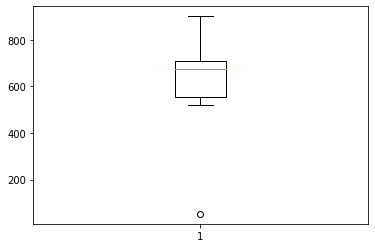

In [117]:
#plotting boxplot to find outliers
plt.boxplot(data1["performance_score"])

Looks like there us an outlier and we have to remove it

In [118]:
#first finr the quartiles
Q1 = np.percentile(data1["performance_score"] ,25 , interpolation = "midpoint")
Q2 = np.percentile(data1["performance_score"] , 50 , interpolation = "midpoint")
Q3 = np.percentile(data1["performance_score"] ,75 , interpolation ="midpoint")

In [119]:
#find the IQR
IQR = Q3-Q1
print("IQR is " ,IQR)

IQR is  155.0


In [120]:
#calculate lower and upper limit
lower_limit = Q1 -1.5*IQR
upper_limit = Q3+1.5*IQR

In [121]:
outlier = []
for x in data1["performance_score"]:
  if ((x > upper_limit) or (x < lower_limit)):
    outlier.append(x)

In [122]:
outlier

[53]

In [123]:
# from above we can see our outlier will be below the lower limit
# now find index values of our outliers
index_outlier = data1["performance_score"] < lower_limit
data1.loc[index_outlier].index

Index(['James Authur'], dtype='object', name='name')

In [124]:
#drop this index from our data
data1.drop(["James Authur"] , inplace = True)

In [125]:
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,F,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,F,Sales,G3,649
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


### **9)-Check the gender column and do Dummy encoding.**

In [127]:
#first we find the dummy columns and add prefix 
dummies = pd.get_dummies(data1["gender"] , prefix ="gender")

In [128]:
#drop the column where we did encoding
data2 = data1.drop("gender" , axis=1)

In [130]:
#add the dummy colums to our data
data2 =pd.concat([data2 ,dummies] , axis =1)

In [145]:
data2

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.000000,52857.142857,Operations,G3,723,1,0
S Kumar,40.428571,16000.000000,Finance,G0,520,1,0
Jack Morgan,32.000000,35000.000000,Finance,G2,674,0,1
Ying Chin,45.000000,65000.000000,Sales,G3,556,1,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,711,1,0
Satyam Sharma,40.428571,62000.000000,Sales,G3,649,1,0
Josh Wills,54.000000,52000.000000,Finance,G3,901,1,0
Leo Duck,23.000000,98000.000000,Sales,G4,709,0,1


### **10)- Do the standard scaling on the feature performance score.**


In [153]:
y = data2["performance_score"]

In [154]:
from sklearn import preprocessing
standardization = preprocessing.StandardScaler()
y = standardization.fit_transform(data2[["performance_score"]])

In [155]:
print(y)

[[ 0.39226224]
 [-1.47587231]
 [-0.05866679]
 [-1.14457751]
 [ 0.28183064]
 [-0.28873262]
 [ 2.03033096]
 [ 0.26342538]]
